In [1]:
%load_ext autoreload
%autoreload 2
%cd '../'

/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from HOTS.STS import STS
from HOTS.Event import Event
from HOTS.ToolsMonitor import DisplaySurface3D, DisplaySurface2D, DisplayImage
from HOTS.Layer import FilterNHBD

%matplotlib inline

# 1. Loading the events

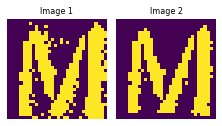

In [3]:
event0 = Event(ImageSize=(32, 32), ListPolarities=[-1, 1])

event0.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=15)

InputFilter = FilterNHBD(threshold=15, neighbourhood=2)
event1 = InputFilter.RunLayer(event0)

DisplayImage([event0, event1])

# 2. Creating the SpatioTemporal Surface

In [4]:
target_event = 1000
SpTe = STS(tau=0.02, R=2, verbose=1, initial_time=0)
Surface = SpTe.create(event=event0, stop=target_event)

Generation of SpatioTemporal Surface in ------ 0.03 s


## 2.1. Plotting the time Matrix

In [5]:
target_event = 1000

In [6]:
SpTe = STS(tau=0.02, R=2, verbose=1, initial_time=0)
Surface = SpTe.create(event=event0, stop=None)

Generation of SpatioTemporal Surface in ------ 0.60 s


In [7]:
w = SpTe.R + 1
x, y = event0.address[target_event, 0], event0.address[target_event, 1]
(x0, y0) = (x + SpTe.R - w, y + SpTe.R - w)
(x1, y1) = (x + SpTe.R + w, y + SpTe.R + w)

''

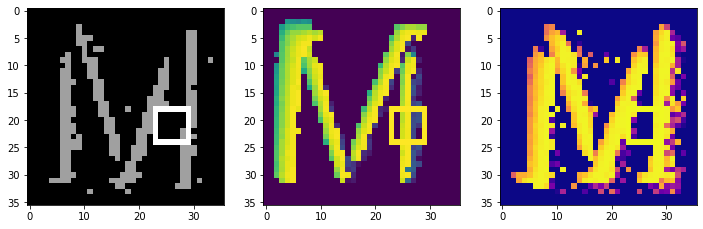

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
image = np.zeros((SpTe.width, SpTe.height))
image[
    event0.address[0 : target_event + 1, 0].T + SpTe.R,
    event0.address[0 : target_event + 1, 1].T + SpTe.R,
] = event0.polarity[0 : target_event + 1].T
image1 = image.copy()
cv2.rectangle(image1, (y0, x0), (y1, x1), color=np.amax(image) + 0.6)
# axs[0].axis('off')
axs[0].imshow(image1, cmap=plt.gray(), interpolation="nearest")

ImageTimeMat1 = SpTe.ListOfTimeMatrix[0, :, :]
cv2.rectangle(ImageTimeMat1, (y0, x0), (y1, x1), color=np.amax(ImageTimeMat1) + 0.001)
# axs[1].axis('off')
axs[1].imshow(ImageTimeMat1, cmap=plt.viridis(), interpolation="nearest")

ImageTimeMat2 = SpTe.ListOfTimeMatrix[1, :, :]
cv2.rectangle(ImageTimeMat2, (y0, x0), (y1, x1), color=np.amax(ImageTimeMat2) + 0.001)
# axs[2].axis('off')
axs[2].imshow(ImageTimeMat2, cmap=plt.plasma(), interpolation="nearest")
;

## 2.2. Plotting the local time Matrix

''

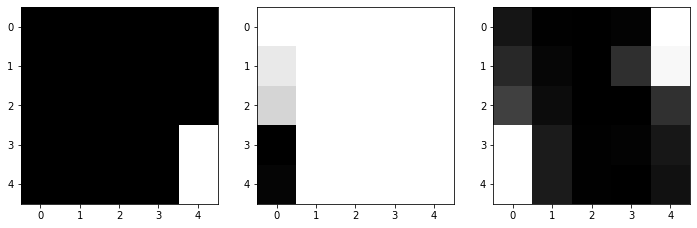

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
x_t, y_t = x + SpTe.R, y + SpTe.R

image_local = image[
    (x_t - SpTe.R) : (x_t + SpTe.R + 1), (y_t - SpTe.R) : (y_t + SpTe.R + 1)
]
axs[0].imshow(image_local, cmap=plt.gray(), interpolation="nearest")
axs[1].imshow(SpTe.LocalTimeDiff[0, :, :], cmap=plt.gray(), interpolation="nearest")
axs[2].imshow(SpTe.LocalTimeDiff[1, :, :], cmap=plt.gray(), interpolation="nearest")
;

## 2.3. Plotting the Spatio Temporal Surfaces

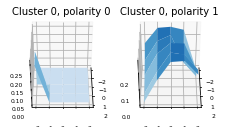

In [10]:
Surface_to_plot = Surface[-1, :][np.newaxis, :]
DisplaySurface3D(Surface_to_plot, nb_polarities=2, angle=(40, 0))

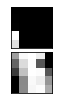

In [11]:
DisplaySurface2D(Surface_to_plot, nb_polarities=2)

# 3. Filtering the event

In [12]:
event0 = Event(ImageSize=(32, 32), ListPolarities=[-1, 1])

event0.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
SpTe = STS(tau=0.02, R=2, verbose=1, initial_time=0)
Surface = SpTe.create(event=event0)
(event_filtered, filt) = SpTe.FilterRecent(event0, threshold=4)

Generation of SpatioTemporal Surface in ------ 0.31 s


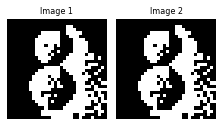

In [13]:
DisplayImage([event0, event_filtered])

In [14]:
from HOTS.Layer import FilterNHBD

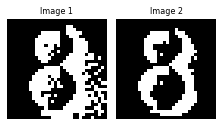

In [15]:
InputFilter = FilterNHBD(threshold=15, neighbourhood=2)
event_filtered = InputFilter.RunLayer(event0)
DisplayImage([event0, event_filtered])

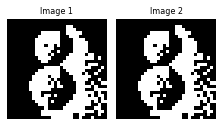

In [16]:
InputFilter = FilterNHBD(threshold=0, neighbourhood=2)
event_filtered = InputFilter.RunLayer(event0)
DisplayImage([event0, event_filtered])

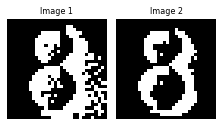

In [17]:
InputFilter = FilterNHBD(threshold=15, neighbourhood=2)
event_filtered = InputFilter.RunLayer(event0)
DisplayImage([event0, event_filtered])